In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('HNSC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_HNSC(np_data)
num_groups = 5

**Logistic Regression (vital status, in-class model)**

Average train accuracy: 80.32 %
Average test accuracy: 77.62 %

Average train accuracy: 79.56 %
Average test accuracy: 77.14 %

Average train accuracy: 80.09 %
Average test accuracy: 77.95 %

========================

Average train accuracy: 81.89 %
Average test accuracy: 80.49 %

Average train accuracy: 81.97 %
Average test accuracy: 80.39 %

Average train accuracy: 82.18 %
Average test accuracy: 80.29 %

In [5]:
y = vital_status

iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels, num_tests = 10, output = False)

In class model:
Average test accuracy: 47.78 %
Scikit model:
Average train accuracy: 82.18 %
Average test accuracy: 80.29 %
Bayes model:
Average test accuracy: 69.67 %


**Linear Regression (days until death, in-class + sklearn model)**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 5000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: nan
Mean in y: 638.43
Variance in y: 598496.77

Scikit model:
Average train accuracy: 41.59 %
Average test accuracy: 31.17 %


**Multivariable Regression (outcome, in-class model)**

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 75.77 %
Average train F1 score: 0.76
Average test accuracy: 75.24 %
Average test F1 score: 0.76


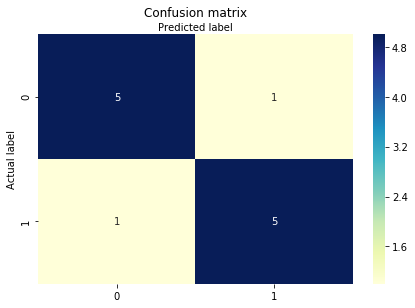


One vs all:
Average train accuracy: 91.18 %
Average train F1 score: 0.92
Average test accuracy: 81.19 %
Average test F1 score: 0.82


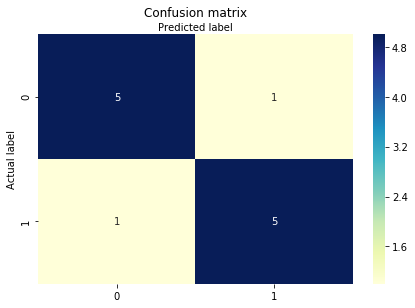


Scikit model:
Average train accuracy: 90.83 %
Average train F1 score: 0.91
Average test accuracy: 81.19 %
Average test F1 score: 0.81


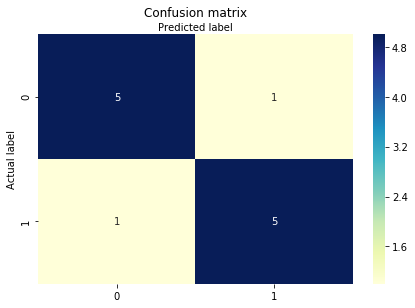


Highest average weights:
tumor_status : 13.29
new_tumor_event_type : 3.92
tumor_stage_4a : 3.44


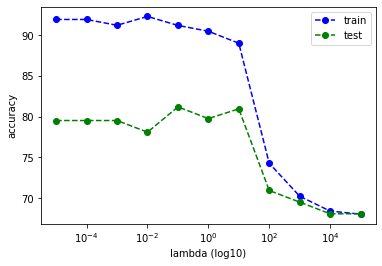

In [5]:
y = outcome
lambda_val = 0.1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)